# CIFAR10 DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPooling2D,
    ReLU,
    Softmax,
)
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

CIFAR-10 stands for Canadian Institute For Advanced Research 10, which is a dataset of 50,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for image classification tasks in machine learning and computer vision.


The 10 classes in the CIFAR-10 dataset are:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

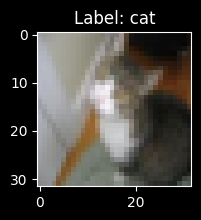

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index][0]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [10]:
ann = Sequential(
    layers=[
        Input(shape=(32, 32, 3)),
        Flatten(),
        Dense(128),
        ReLU(),
        Dropout(0.25),
        Dense(10),
        Softmax(),
    ],
    name="ann",
)

In [11]:
ann.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [12]:
ann.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ann.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

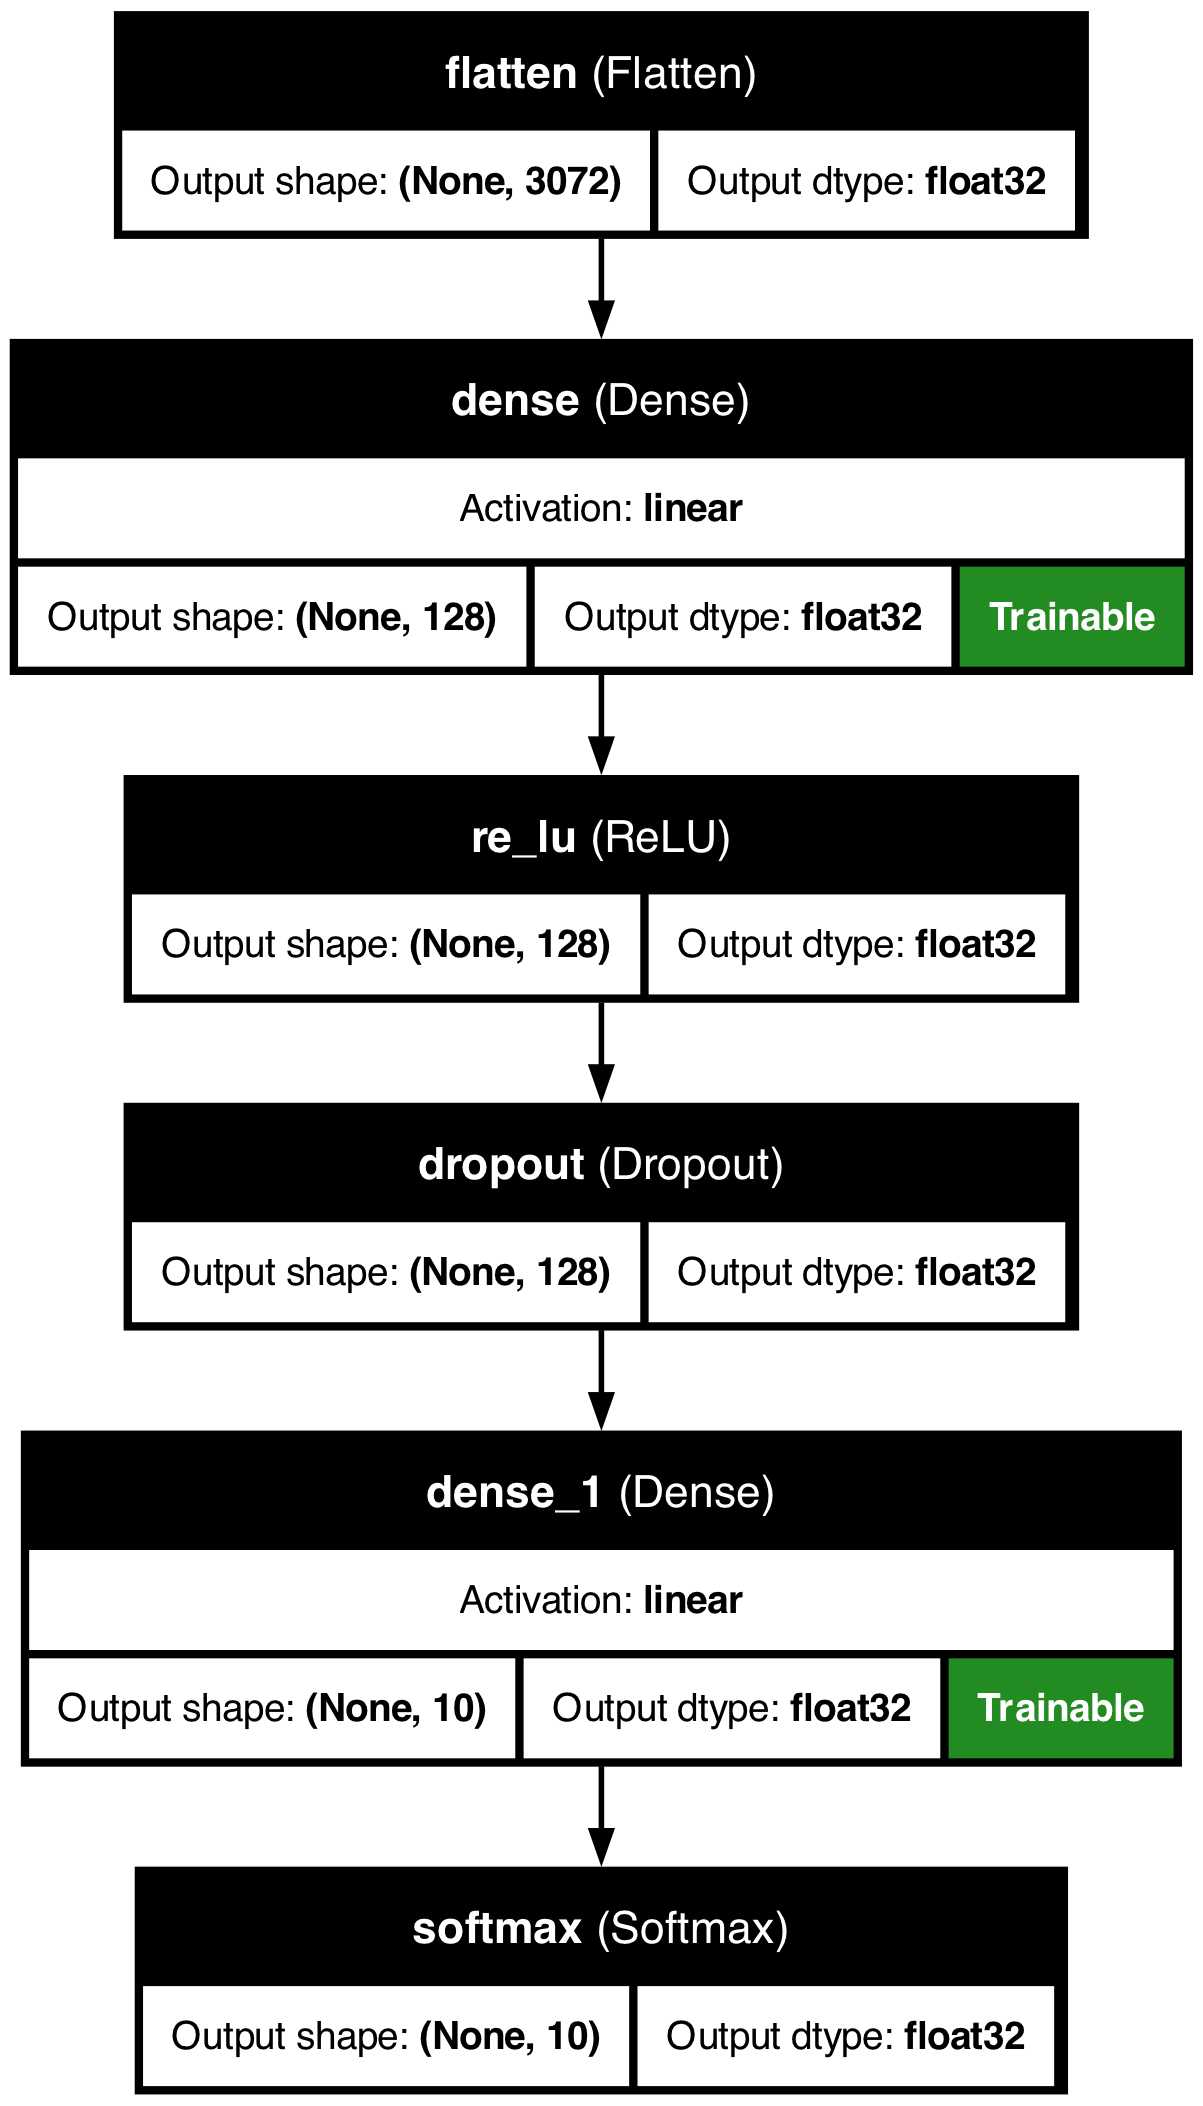

In [14]:
plot_model(
    ann,
    to_file="../Images/cifar10_ann.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_ann.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_ann_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/cifar10_ann_logs"

ann_csvlogger_callback = CSVLogger("../Logs/cifar10_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.2153 - sparse_categorical_accuracy: 0.1794 - val_loss: 1.9587 - val_sparse_categorical_accuracy: 0.2748
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.0172 - sparse_categorical_accuracy: 0.2331 - val_loss: 1.9514 - val_sparse_categorical_accuracy: 0.2770
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9939 - sparse_categorical_accuracy: 0.2376 - val_loss: 1.8962 - val_sparse_categorical_accuracy: 0.2695
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.9726 - sparse_categorical_accuracy: 0.2413 - val_loss: 1.9083 - val_sparse_categorical_accuracy: 0.2825
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.9625 - sparse_categorical_accuracy: 0.2471 - val_loss: 1.9210 - val_sparse_categorical_accuracy: 0.2801


In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 2.007084321975708
Validation loss: 1.927124309539795
0.234615 Training accuracy with a standard deviation of 0.014705
0.276780 Validation accuracy with a standard deviation of 0.004488


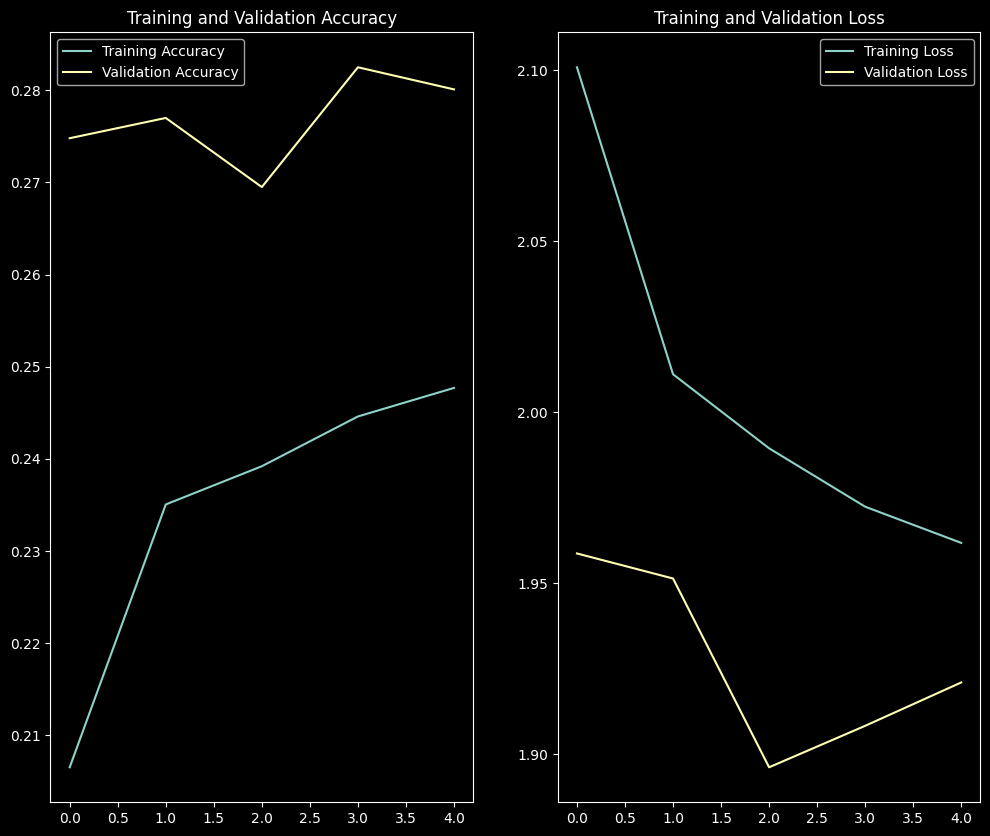

In [17]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 1.9191 - sparse_categorical_accuracy: 0.2794
Test loss: 1.9161309003829956
Test accuracy: 0.28130000829696655


In [19]:
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


## CNN


In [20]:
cnn = Sequential(
    layers=[
        Input(shape=(32, 32, 3)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(10),
        Softmax(),
    ],
    name="cnn",
)

In [21]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Softmax name=softmax_1, built=True>]

In [22]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

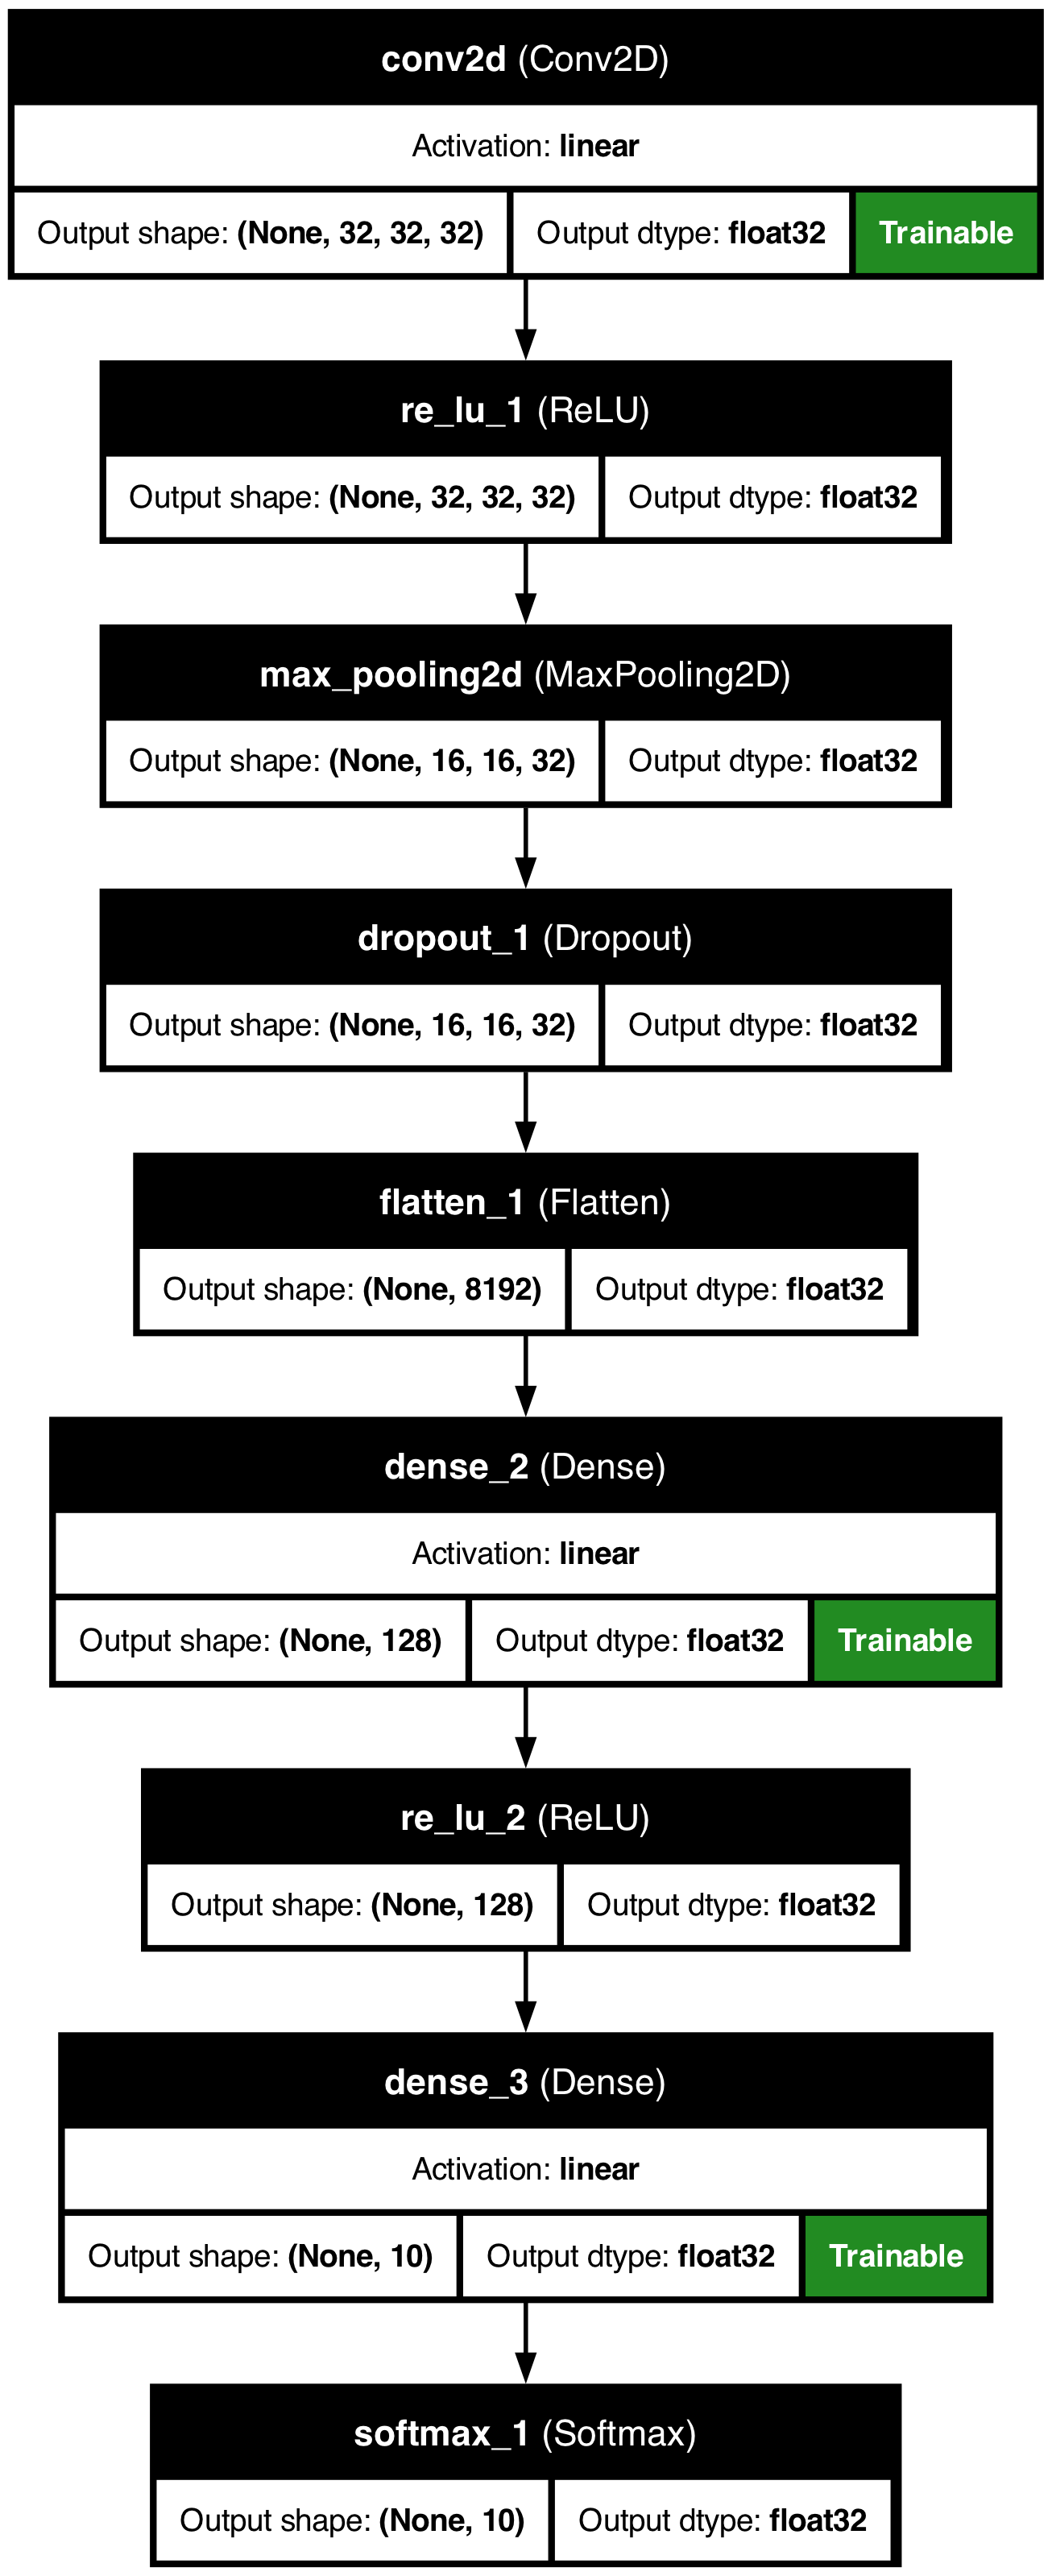

In [24]:
plot_model(
    cnn,
    to_file="../Images/cifar10_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [25]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/cifar10_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/cifar10_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/cifar10_cnn_logs"

cnn_csvlogger_callback = CSVLogger("../Logs/cifar10_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 1.7999 - sparse_categorical_accuracy: 0.3509 - val_loss: 1.3626 - val_sparse_categorical_accuracy: 0.5278
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - loss: 1.3364 - sparse_categorical_accuracy: 0.5278 - val_loss: 1.2620 - val_sparse_categorical_accuracy: 0.5564
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 1.2025 - sparse_categorical_accuracy: 0.5760 - val_loss: 1.2045 - val_sparse_categorical_accuracy: 0.5821
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 1.1233 - sparse_categorical_accuracy: 0.6068 - val_loss: 1.1645 - val_sparse_categorical_accuracy: 0.5976
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 1.0543 - sparse_categorical_accuracy: 0.6334 - val_loss: 1.1037 - val_sparse_categorical_accuracy: 0.6179


In [26]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 1.250326895713806
Validation loss: 1.2194674015045166
0.557305 Training accuracy with a standard deviation of 0.071658
0.576360 Validation accuracy with a standard deviation of 0.031515


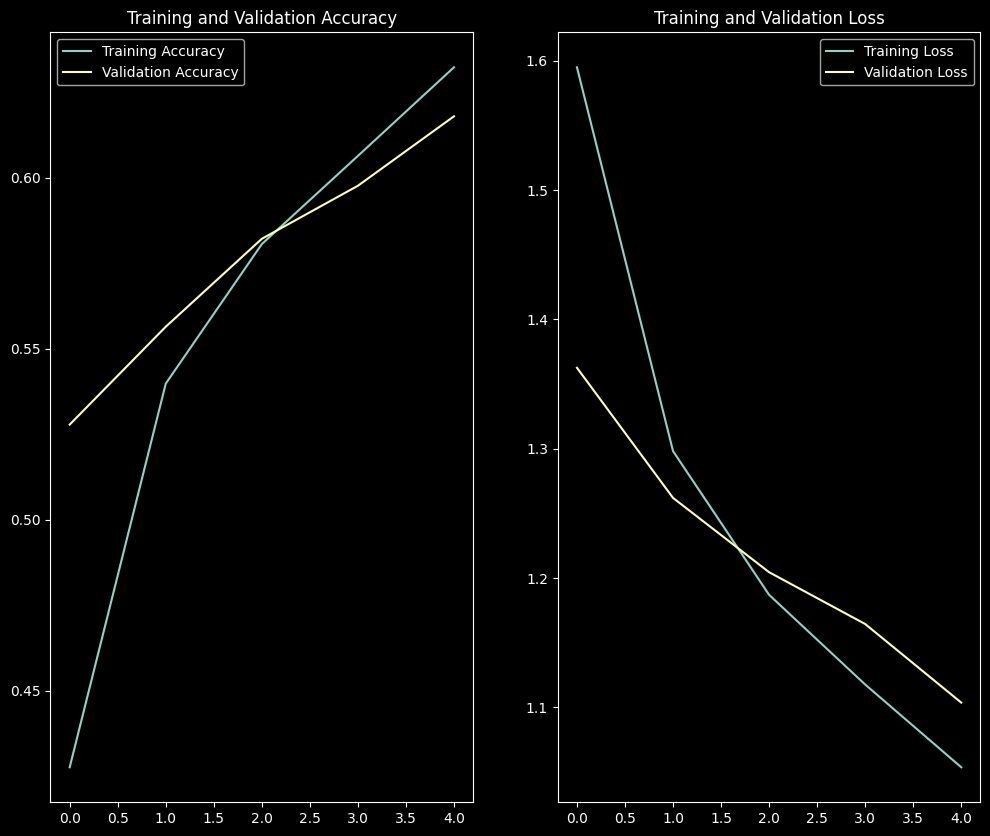

In [27]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/cifar10_cnn_acc_loss.png", bbox_inches="tight")

In [28]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0877 - sparse_categorical_accuracy: 0.6170
Test loss: 1.0979045629501343
Test accuracy: 0.6118999719619751


In [29]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
